In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.interpolate import interp1d

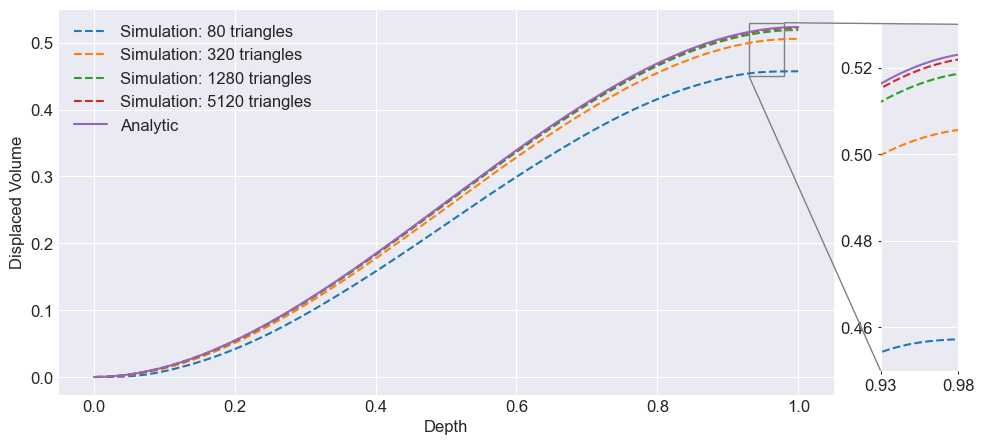

In [111]:
data_coarse = pd.read_csv("data/CoarseSphereResults.csv")
data_semi_coarse = pd.read_csv("data/SemiCoarseSphereResults.csv")
data_semi_detailed = pd.read_csv("data/SemiDetailedSphereResults.csv")
data_detailed = pd.read_csv("data/DetailedSphereResults.csv")

R = 0.5
h_analytical = np.linspace(0, 2*R, 500)
V_analytical = (np.pi * h_analytical**2 / 3) * (3*R - h_analytical)

data_coarse = data_coarse[data_coarse['depth'] <= 1.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] <= 1.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] <= 1.0]
data_detailed = data_detailed[data_detailed['depth'] <= 1.0]
data_coarse = data_coarse[data_coarse['depth'] >= 0.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] >= 0.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] >= 0.0]
data_detailed = data_detailed[data_detailed['depth'] >= 0.0]

mpl.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 5))
plt.grid(True)
ax.plot(data_coarse['depth'], data_coarse['volume'], '--', label='Simulation: 80 triangles')
ax.plot(data_semi_coarse['depth'], data_semi_coarse['volume'], '--', label='Simulation: 320 triangles')
ax.plot(data_semi_detailed['depth'], data_semi_detailed['volume'], '--', label='Simulation: 1280 triangles')
ax.plot(data_detailed['depth'], data_detailed['volume'], '--', label='Simulation: 5120 triangles')
ax.plot(h_analytical, V_analytical, label='Analytic')
ax.set_xlabel('Depth')
ax.set_ylabel('Displaced Volume')
ax.legend()

# Define the bounding box for the zoomed-in area
x1, x2, y1, y2 = 0.93, 0.98, 0.45, 0.53  # Adjust as needed

# Create inset axes
axins = inset_axes(ax, width="10%", height="90%", loc='lower left',
                   bbox_to_anchor=(1.05, 0.04, 1, 1),
                   bbox_transform=ax.transAxes)

# Plot the same data on the inset axes
axins.plot(data_coarse['depth'], data_coarse['volume'], '--')
axins.plot(data_semi_coarse['depth'], data_semi_coarse['volume'], '--')
axins.plot(data_semi_detailed['depth'], data_semi_detailed['volume'], '--')
axins.plot(data_detailed['depth'], data_detailed['volume'], '--')
axins.plot(h_analytical, V_analytical)

# Set the limits for the inset axes to zoom in on the bounding box
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([0.93, 0.98])
axins.set_yticks([0.46, 0.48, 0.50, 0.52])
axins.tick_params(axis='both', length=2)  # Hide tick marks




# Use mark_inset to draw a box and connect it to the zoomed area
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

plt.savefig("results/submerged_volume_sphere_with_zoom_and_box.pdf", bbox_inches='tight')


In [ ]:
data_semi_coarse = pd.read_csv("data/SemiCoarseSphereResults.csv")
data_semi_coarse_fully = pd.read_csv("data/SemiCoarseDataOnlyFullySubmergedTriangles.csv")

R = 0.5
h_analytical = np.linspace(0, 2*R, 500)
V_analytical = (np.pi * h_analytical**2 / 3) * (3*R - h_analytical)

data_coarse = data_coarse[data_coarse['depth'] <= 1.0]
data_semi_coarse_fully = data_semi_coarse_fully[data_semi_coarse_fully['depth'] <= 1.0]

mpl.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 5))
plt.grid(True)
ax.plot(data_coarse['depth'], data_coarse['volume'], '--', label='Simulation: 80 triangles')
ax.plot(data_semi_coarse['depth'], data_semi_coarse['volume'], '--', label='Simulation: 320 triangles')
ax.plot(data_semi_detailed['depth'], data_semi_detailed['volume'], '--', label='Simulation: 1280 triangles')
ax.plot(data_detailed['depth'], data_detailed['volume'], '--', label='Simulation: 5120 triangles')
ax.plot(h_analytical, V_analytical, label='Analytic')
ax.set_xlabel('Depth')
ax.set_ylabel('Displaced Volume')
ax.legend()

# Define the bounding box for the zoomed-in area
x1, x2, y1, y2 = 0.93, 0.98, 0.45, 0.53  # Adjust as needed

# Create inset axes
axins = inset_axes(ax, width="10%", height="90%", loc='lower left',
                   bbox_to_anchor=(1.05, 0.04, 1, 1),
                   bbox_transform=ax.transAxes)

# Plot the same data on the inset axes
axins.plot(data_coarse['depth'], data_coarse['volume'], '--')
axins.plot(data_semi_coarse['depth'], data_semi_coarse['volume'], '--')
axins.plot(data_semi_detailed['depth'], data_semi_detailed['volume'], '--')
axins.plot(data_detailed['depth'], data_detailed['volume'], '--')
axins.plot(h_analytical, V_analytical)

# Set the limits for the inset axes to zoom in on the bounding box
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([0.93, 0.98])
axins.set_yticks([0.46, 0.48, 0.50, 0.52])
axins.tick_params(axis='both', length=2)  # Hide tick marks




# Use mark_inset to draw a box and connect it to the zoomed area
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

plt.savefig("results/submerged_volume_sphere_with_zoom_and_box.pdf", bbox_inches='tight')

In [107]:
# Interpolation of the analytical solution
depth_coarse = data_coarse['depth'].to_numpy()
depth_semi_coarse = data_semi_coarse['depth'].to_numpy()
depth_semi_detailed = data_semi_detailed['depth'].to_numpy()
depth_detailed = data_detailed['depth'].to_numpy()

volume_coarse = data_coarse['volume'].to_numpy()
volume_semi_coarse = data_semi_coarse['volume'].to_numpy()
volume_semi_detailed = data_semi_detailed['volume'].to_numpy()
volume_detailed = data_detailed['volume'].to_numpy()

V_analytical_interp_coarse = interp1d(h_analytical, V_analytical)(depth_coarse)
V_analytical_interp_semi_coarse = interp1d(h_analytical, V_analytical)(depth_semi_coarse)
V_analytical_interp_semi_detailed = interp1d(h_analytical, V_analytical)(depth_semi_detailed)
V_analytical_interp_detailed = interp1d(h_analytical, V_analytical)(depth_detailed)

# Calculation of absolute errors
error_coarse = (volume_coarse - V_analytical_interp_coarse)**2
error_semi_coarse = (volume_semi_coarse - V_analytical_interp_semi_coarse)**2
error_semi_detailed = (volume_semi_detailed - V_analytical_interp_semi_detailed)**2
error_detailed = (volume_detailed - V_analytical_interp_detailed)**2

rms_coarse = np.sqrt(np.mean(error_coarse))
rms_semi_coarse = np.sqrt(np.mean(error_semi_coarse))
rms_semi_detailed = np.sqrt(np.mean(error_semi_detailed))
rms_detailed = np.sqrt(np.mean(error_detailed))
(rms_coarse, rms_semi_coarse, rms_semi_detailed, rms_detailed)

(0.03853322443365288,
 0.010263255629503842,
 0.0026104462513712864,
 0.0006553204043730979)

In [124]:
100*(V_analytical[-1]-volume_coarse[-1])/V_analytical[-1]

12.654684977554806

In [108]:
data_coarse = pd.read_csv("data/CoarseSphereResultsTime.csv")
data_semi_coarse = pd.read_csv("data/SemiCoarseSphereResultsTime.csv")
data_semi_detailed = pd.read_csv("data/SemiDetailedSphereResultsTime.csv")
data_detailed = pd.read_csv("data/DetailedSphereResultsTime.csv")

coarse_triangle_count = 80
semi_coarse_triangle_count = 320
semi_detailed_triange_count = 1280
detailed_triangle_count = 5120

data_coarse = data_coarse[data_coarse['depth'] <= 1.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] <= 1.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] <= 1.0]
data_detailed = data_detailed[data_detailed['depth'] <= 1.0]
data_coarse = data_coarse[data_coarse['depth'] >= 0.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] >= 0.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] >= 0.0]
data_detailed = data_detailed[data_detailed['depth'] >= 0.0]

avg_time_coarse = np.mean(data_coarse['timespan'])
avg_time_semi_coarse = np.mean(data_semi_coarse['timespan'])
avg_time_semi_detailed = np.mean(data_semi_detailed['timespan'])
avg_time_detailed = np.mean(data_detailed['timespan'])

# Updating the list of average times with the defined values

average_times = [avg_time_coarse, avg_time_semi_coarse, avg_time_semi_detailed, avg_time_detailed]
triangle_counts = ['80', '320', '1280', '5120']